# Import required modules

In [289]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score

from xgboost import plot_tree
import matplotlib.pyplot as plt

# Import the data set

In [290]:
# Read in the csv that we will use
data = pd.read_csv('/Users/harryfloyd/Desktop/Breast_cancer_data.csv')
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


# Split the data into train and test data

In [291]:
train = data.drop(['diagnosis'], axis = 1)
test = data['diagnosis']

In [292]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 7)

In [293]:
train = xgb.DMatrix(x_train, label = y_train, enable_categorical = True)

In [294]:
test = xgb.DMatrix(x_test, label = y_test, enable_categorical = True)

In [295]:
param = {
    'max_depth' : 1,
    'eta' : 0.3,
    'objective' : 'multi:softmax',
    'num_class' : 2
}

epochs = 10

In [296]:
model = xgb.train(param, train, epochs)

In [297]:
predictions = model.predict(test)

In [298]:
# View estimates vs actuals
# for i in zip(y_test,predictions):
#    print(i)

In [299]:
print(predictions)

[1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.]


In [300]:
accuracy_score(y_test, predictions)

0.956140350877193

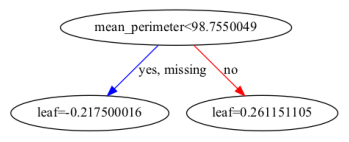

In [301]:
# plot single tree
plot_tree(model)
plt.show()